In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(50)
citrus_acid_content = np.random.randint(1,5,200)
density_of_wine = np.random.randint(9930,9970,200)
quality = 15000 * (citrus_acid_content/density_of_wine)
quality

array([1.51042191, 1.50496639, 6.03439606, 3.01053688, 3.01689461,
       4.5308095 , 1.50723473, 4.51444623, 3.02114804, 4.52534191,
       4.51807229, 3.01325834, 3.01993155, 4.52443193, 6.02470128,
       4.52534191, 6.02893891, 6.0398631 , 1.50890252, 4.52306764,
       6.03378922, 1.51011779, 6.02530629, 4.52989732, 4.51943356,
       4.5153522 , 1.50950991, 6.03439606, 6.02954477, 3.01265314,
       3.01477238, 4.52534191, 3.01719803, 1.50526844, 4.52898551,
       6.03500302, 4.53172205, 6.04229607, 4.52807406, 6.02288697,
       4.52534191, 3.01993155, 6.02288697, 6.03803965, 4.5153522 ,
       1.50678051, 6.0356101 , 4.51988751, 1.50572174, 1.50708329,
       6.01926164, 4.53035337, 4.51897971, 1.50981379, 4.51897971,
       6.04168764, 1.50526844, 3.02023558, 3.02114804, 4.52625226,
       1.50496639, 6.03500302, 4.51716523, 4.52215858, 6.03378922,
       6.03075686, 1.50814398, 1.50557061, 6.03075686, 4.51716523,
       4.52989732, 3.01659125, 6.03136309, 1.5058729 , 1.50723

In [3]:
def Winestatus(quality):
    quality = float(quality)
    if quality <= 3 and quality >0:
        return 'normal'
    elif quality <= 6 and quality>3:
        return 'good'
    elif quality <=10 and quality >6:
        return 'best'

Winestatus = np.array([Winestatus(b) for b in quality])
WSA=pd.DataFrame({'citrus_content':citrus_acid_content,'density':density_of_wine,'quality':quality,'Wine Status':Winestatus})
WSA

,citrus_content,density,quality,Wine Status
0,1,9931,1.510422,normal
1,1,9967,1.504966,normal
2,4,9943,6.034396,best
3,2,9965,3.010537,good
4,2,9944,3.016895,good
...,...,...,...,...
195,1,9961,1.505873,normal
196,1,9947,1.507992,normal
197,3,9967,4.514899,good
198,1,9965,1.505268,normal


In [4]:
L_C = LabelEncoder()
WSA['Wine Status'] = L_C.fit_transform(WSA['Wine Status'])



In [5]:
X = WSA[['citrus_content','density']]
Y = WSA['Wine Status']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [7]:
print(X_train,X_test,Y_train,Y_test)

     citrus_content  density
114               3     9937
187               4     9935
76                3     9935
122               1     9965
142               3     9969
..              ...      ...
132               1     9959
33                1     9965
109               4     9940
139               2     9954
176               2     9958

[140 rows x 2 columns]      citrus_content  density
112               1     9943
165               3     9948
12                2     9934
73                1     9961
144               4     9939
20                4     9944
199               4     9950
8                 2     9930
39                4     9962
88                1     9953
81                3     9948
197               3     9967
69                3     9962
160               4     9931
25                3     9966
99                2     9969
151               1     9948
23                3     9934
138               3     9943
159               4     9946
89                4

In [8]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:

def predictWSA(data, model, L_C):
    p = model.predict(data)
    p_c = L_C.inverse_transform(p)[0]
    return p_c

# Get user input and convert to float
user_citrus_C = float(input("Enter your citrus acid content: "))
user_density = float(input("Enter your density of wine: "))

# Create input data as a 2D array
input_data = np.array([[user_citrus_C, user_density]])

# Predict BMI category
predicted_category = predictWSA(input_data, model, L_C)
print(f"Predicted quality: {predicted_category}")

# Find the k-nearest neighbors
D, I = model.kneighbors(input_data, n_neighbors=4)
print(f"Distances = {D}")
print(f"Indices = {I}")

Enter your citrus acid content:  3
Enter your density of wine:  1900


Predicted quality: best
Distances = [[8030.         8030.         8030.00006227 8030.00006227]]
Indices = [[87 88 61 40]]


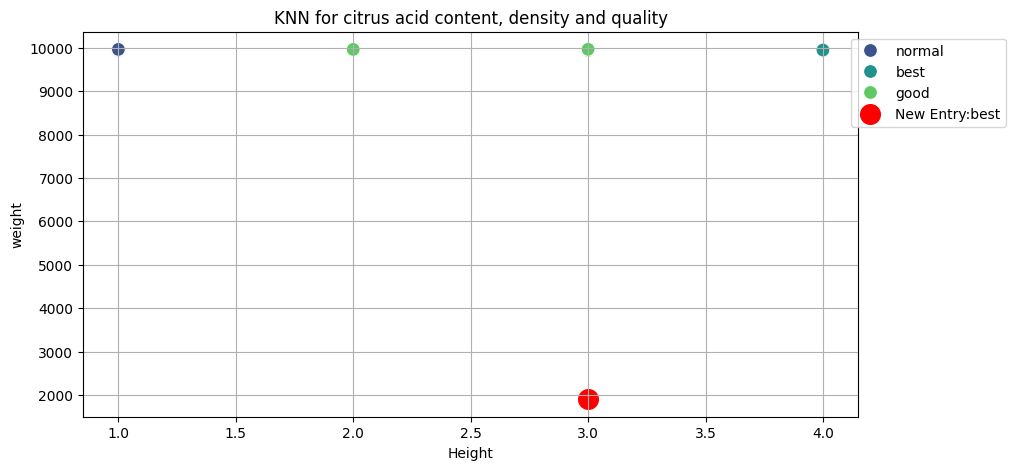

Height:3.0 | weight:1900.0 | predicted category: best


In [10]:

plt.figure(figsize=(10,5))
#training data plot
sns.scatterplot(data=X,x=citrus_acid_content,y=density_of_wine,hue=L_C.inverse_transform(Y),palette = 'viridis',s=100)
#input data plot
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry:{predicted_category}')
plt.title("KNN for citrus acid content, density and quality")
plt.xlabel("Height")
plt.ylabel("weight")
plt.legend(loc= "upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.grid(True)
plt.show()
print(f"Height:{user_citrus_C} | weight:{user_density} | predicted category: {predicted_category}")